<a href="https://colab.research.google.com/github/Elwing-Chou/ml0602/blob/main/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
# DataFrame: 表格. Series: 一行/一列. 
df = pd.DataFrame(iris["data"], 
                  columns=iris["feature_names"])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(iris["data"])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [3]:
cluster.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [4]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [5]:
df["label"] = cluster.labels_
# save
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
from sklearn.metrics import silhouette_score
for testk in range(2, 30):
    test = KMeans(n_clusters=testk)
    test.fit(iris["data"])
    score = silhouette_score(iris["data"], test.labels_)
    print(testk, ":", score)

2 : 0.681046169211746
3 : 0.5528190123564091
4 : 0.4980505049972867
5 : 0.4887488870931048
6 : 0.3678464984712235
7 : 0.3542978877198838
8 : 0.36139455801853443
9 : 0.3291355337265451
10 : 0.3056379628619082
11 : 0.31752147933810365
12 : 0.2925844342539958
13 : 0.2862765250611379
14 : 0.2996676367245417
15 : 0.2945285655756612
16 : 0.2886145355947101
17 : 0.2763247923014838
18 : 0.2804494709245185
19 : 0.26923783424371533
20 : 0.29606264527428244
21 : 0.28621810301535694
22 : 0.27603188932404904
23 : 0.27402293690335056
24 : 0.2740573478593884
25 : 0.2720614376417468
26 : 0.26600569132364144
27 : 0.2762943581261185
28 : 0.26981962156527806
29 : 0.2713524905645124


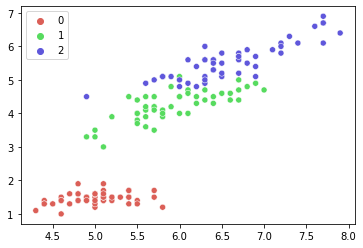

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sl = iris["data"][:, 0]
pl = iris["data"][:, 2]
sns.scatterplot(x=sl, 
                y=pl, 
                hue=iris["target"], 
                palette=sns.color_palette("hls", 3))